In [1]:
"""
多边形棱柱重力梯度正演
"""
# 3rd imports
import matplotlib.pyplot as plt
# local imports
from geoist import gridder
from geoist.inversion import geometry
from geoist.pfm import polyprism
from geoist.vis import giplt



In [2]:
#多边形棱柱体参数设置
#print("Draw the polygons one by one")
bounds = [-10000, 10000, -10000, 10000, 0, 5000]
area = bounds[:4]
#axis = plt.figure().gca()
#plt.axis('scaled')
verts = [[-2000, -3000], [-2000, 2000], [3000, 3000], [2000, -3000]]
model = [
    geometry.PolygonalPrism(
       # giplt.draw_polygon(area, axis, xy2ne=True),
        verts,
        0, 1000, {'density': 500})]


In [3]:
#观测数据
shape = (100, 100)
xp, yp, zp = gridder.regular(area, shape, z=-500)
#计算重力梯度张量
data = [
    polyprism.gxx(xp, yp, zp, model),
    polyprism.gxy(xp, yp, zp, model),
    polyprism.gxz(xp, yp, zp, model),
    polyprism.gyy(xp, yp, zp, model),
    polyprism.gyz(xp, yp, zp, model),
    polyprism.gzz(xp, yp, zp, model)]

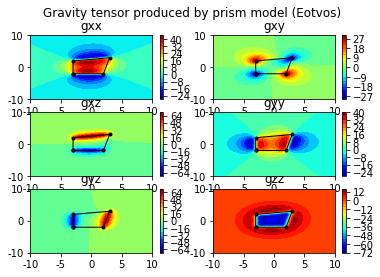

In [4]:
# 画图
titles = ['gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz']
plt.figure()
plt.axis('scaled')
plt.suptitle("Gravity tensor produced by prism model (Eotvos)")
for i in range(len(data)):
    plt.subplot(3, 2, i + 1)
    plt.title(titles[i])
    giplt.contourf(yp, xp, data[i], shape, 20)
    plt.colorbar()
    for p in model:
        giplt.polygon(p, '.-k', xy2ne=True)
    giplt.set_area(area)
    giplt.m2km()
plt.show()